计算机视觉作为一门让机器学会如何去“看”的学科，具体的说，就是让机器去识别摄像机拍摄的图片或视频中的物体，检测出物体所在的位置，并对目标物体进行跟踪，从而理解并描述出图片或视频里的场景和故事，以此来模拟人脑视觉系统。因此，计算机视觉也通常被叫做机器视觉，其目的是建立能够从图像或者视频中“感知”信息的人工系统。

计算机视觉技术经过几十年的发展，已经在交通（车牌识别、道路违章抓拍）、安防（人脸闸机、小区监控）、金融（刷脸支付、柜台的自动票据识别）、医疗（医疗影像诊断）、工业生产（产品缺陷自动检测）等多个领域应用，影响或正在改变人们的日常生活和工业生产方式。未来，随着技术的不断演进，必将涌现出更多的产品和应用，为我们的生活创造更大的便利和更广阔的机会。
<br></br>
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/93476b373dd342d1aae22397aa24c58fc60ab68307fd448189f16c8284723e9d" width = "500"></center>
<center><br>图1：计算机视觉技术在各领域的应用</br></center>
<br></br>

飞桨为计算机视觉任务提供了丰富的API，并通过底层优化和加速保证了这些API的性能。同时，飞桨还提供了丰富的模型库，覆盖图像分类、检测、分割、文字识别和视频理解等多个领域。用户可以直接使用这些API组建模型，也可以在飞桨提供的模型库基础上进行二次研发。

由于篇幅所限，本章将重点介绍计算机视觉的经典模型（卷积神经网络）和两个典型任务（图像分类和目标检测）。主要涵盖如下内容：

**卷积神经网络**：卷积神经网络（Convolutional Neural Networks, CNN）是计算机视觉技术最经典的模型结构。本教程主要介绍卷积神经网络的常用模块，包括：卷积、池化、批归一化、丢弃法等。

- **图像分类**：介绍图像分类算法的经典模型结构，包括：LeNet、AlexNet、VGG、GoogLeNet、ResNet，并通过眼疾筛查的案例展示算法的应用。

- **目标检测**：介绍目标检测YOLOv3算法，并通过林业病虫害检测案例展示YOLOv3算法的应用。


# 计算机视觉的发展历程

计算机视觉的发展历程要从生物视觉讲起。对于生物视觉的起源，目前学术界尚没有形成定论。有研究者认为最早的生物视觉形成于距今约[7亿年前的水母之中](https://www.pnas.org/content/109/46/18868)，也有研究者认为生物视觉产生于距今约5亿年前寒武纪【[1](https://doi.org/10.1038%2Fnature10097), [2](https://en.wikipedia.org/wiki/Evolution_of_the_eye)】。寒武纪生物大爆发的原因一直是个未解之谜，不过可以肯定的是在寒武纪动物具有了视觉能力，捕食者可以更容易地发现猎物，被捕食者也可以更早的发现天敌的位置。视觉能力加剧了猎手和猎物之间的博弈，也催生出更加激烈的生存演化规则。视觉系统的形成有力地推动了食物链的演化，加速了生物进化过程，是生物发展史上重要的里程碑。经过几亿年的演化，目前人类的视觉系统已经具备非常高的复杂度和强大的功能，人脑中神经元数目达到了1000亿个，这些神经元通过网络互相连接，这样庞大的视觉神经网络使得我们可以很轻松的观察周围的世界，如 **图2** 所示。
<br></br>
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/70d8475ed908487680057bf1f2760f10e367e7176acf43ebb380207b748b2377" width = "600"></center>
<center><br>图2：人类视觉感知</br></center>
<br></br>

对人类来说，识别猫和狗是件非常容易的事。但对计算机来说，即使是一个精通编程的高手，也很难轻松写出具有通用性的程序（比如：假设程序认为体型大的是狗，体型小的是猫，但由于拍摄角度不同，可能一张图片上猫占据的像素比狗还多）。那么，如何让计算机也能像人一样看懂周围的世界呢？研究者尝试着从不同的角度去解决这个问题，由此也发展出一系列的子任务，如 **图3** 所示。
<br></br>
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/d65f1ebcb0054dcb81a8eb50223adc529bb9b63265ab467d931a5df5b2864122" width = "500"></center>
<center><br>图3：计算机视觉子任务示意图</br></center>
<br></br>

- **(a) Image Classification：** 图像分类，用于识别图像中物体的类别（如：bottle、cup、cube）。

- **(b) Object Localization：** 目标检测，用于检测图像中每个物体的类别，并准确标出它们的位置。

- **(c) Semantic Segmentation：** 图像语义分割，用于标出图像中每个像素点所属的类别，属于同一类别的像素点用一个颜色标识。

- **(d) Instance Segmentation：** 实例分割，值得注意的是，（b）中的目标检测任务只需要标注出物体位置，而（d）中的实例分割任务不仅要标注出物体位置，还需要标注出物体的外形轮廓。

在早期的图像分类任务中，通常是先人工提取图像特征，再用机器学习算法对这些特征进行分类，分类的结果强依赖于特征提取方法，往往只有经验丰富的研究者才能完成，如 **图4** 所示。
<br></br>
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/01179d17c9f74570b8a618d6123261ce6e10344f11c84dda8e47d44c1eb4fc81" width = "500"></center>
<center><br>图4：早期的图像分类任务</br></center>
<br></br>

在这种背景下，基于神经网络的特征提取方法应运而生。Yann LeCun是最早将卷积神经网络应用到图像识别领域的，其主要逻辑是使用卷积神经网络提取图像特征，并对图像所属类别进行预测，通过训练数据不断调整网络参数，最终形成一套能自动提取图像特征并对这些特征进行分类的网络，如 **图5** 所示。
<br></br>
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/1ccd30567304415d98b0b373ec641a3d00f76d803f194ea4b14aa85ce85bf7bb" width = "500"></center>
<center><br>图5：早期的卷积神经网络处理图像任务示意</br></center>
<br></br>

这一方法在手写数字识别任务上取得了极大的成功，但在接下来的时间里，却没有得到很好的发展。其主要原因一方面是数据集不完善，只能处理简单任务，在大尺寸的数据上容易发生过拟合；另一方面是硬件瓶颈，网络模型复杂时，计算速度会特别慢。

目前，随着互联网技术的不断进步，数据量呈现大规模的增长，越来越丰富的数据集不断涌现。另外，得益于硬件能力的提升，计算机的算力也越来越强大。不断有研究者将新的模型和算法应用到计算机视觉领域。由此催生了越来越丰富的模型结构和更加准确的精度，同时计算机视觉所处理的问题也越来越丰富，包括分类、检测、分割、场景描述、图像生成和风格变换等，甚至还不仅仅局限于2维图片，包括视频处理技术和3D视觉等。



# 卷积神经网络

卷积神经网络是目前计算机视觉中使用最普遍的模型结构。本章节主要向读者介绍卷积神经网络的一些基础模块，包括：
  
  - 卷积（Convolution）
  - 池化（Pooling）
  - 批归一化（Batch Normalization）
  - 丢弃法（Dropout）
  
回顾一下，在上一章“一个案例带你吃透深度学习”中，我们介绍了手写数字识别任务，应用的是全连接网络进行特征提取，即将一张图片上的所有像素点展开成一个1维向量输入网络，存在如下两个问题：

**1. 输入数据的空间信息被丢失。** 空间上相邻的像素点往往具有相似的RGB值，RGB的各个通道之间的数据通常密切相关，但是转化成1维向量时，这些信息被丢失。同时，图像数据的形状信息中，可能隐藏着某种本质的模式，但是转变成1维向量输入全连接神经网络时，这些模式也会被忽略。

**2. 模型参数过多，容易发生过拟合。** 在手写数字识别案例中，每个像素点都要跟所有输出的神经元相连接。当图片尺寸变大时，输入神经元的个数会按图片尺寸的平方增大，导致模型参数过多，容易发生过拟合。

为了解决上述问题，我们引入卷积神经网络进行特征提取，既能提取到相邻像素点之间的特征模式，又能保证参数的个数不随图片尺寸变化。**图6** 是一个典型的卷积神经网络结构，多层卷积和池化层组合作用在输入图片上，在网络的最后通常会加入一系列全连接层。网络中通常还会加入Dropout来防止过拟合。

<br></br>
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/6d1440daa10944c899a7c98e1bed3931a09bae52730d4c20a65b322193d284e1" width = "1000"></center>
<center><br>图6：卷积神经网络经典结构</br></center>
<br></br>

------
**说明：**

在卷积神经网络中，计算范围是在像素点的空间邻域内进行的，卷积核参数的数目也远小于全连接层。卷积核本身与输入图片大小无关，它代表了对空间邻域内某种特征模式的提取。比如，有些卷积核提取物体边缘特征，有些卷积核提取物体拐角处的特征，图像上不同区域共享同一个卷积核。当输入图片大小不一样时，仍然可以使用同一个卷积核进行操作。

------

## 卷积（Convolution）

这一小节将为读者介绍卷积算法的原理和实现方案，并通过具体的案例展示如何使用卷积对图片进行操作，主要涵盖如下内容：

- 卷积计算

- 填充（padding）

- 步幅（stride）

- 感受野（Receptive Field）

- 多输入通道、多输出通道和批量操作

- 飞桨卷积API介绍

- 卷积算子应用举例


### 卷积计算

卷积是数学分析中的一种积分变换的方法，在图像处理中采用的是卷积的离散形式。这里需要说明的是，在卷积神经网络中，卷积层的实现方式实际上是数学中定义的互相关  （cross-correlation）运算，与数学分析中的卷积定义有所不同，这里跟其他框架和卷积神经网络的教程保持一致，都使用互相关运算作为卷积的定义，具体的计算过程如 **图7** 所示。

<br></br>
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/d5019afe174745efbf7a3d3c604b9c85eeddc947f7184446a9147d128863864d" width = "700"></center>
<center><br>图7：卷积计算过程</br></center>
<br></br>

------
**说明：**

卷积核（kernel）也被叫做滤波器（filter），假设卷积核的高和宽分别为$k_h$和$k_w$，则将称为$k_h\times k_w$卷积，比如$3\times5$卷积，就是指卷积核的高为3, 宽为5。

-----

- 如图7（a）所示：左边的图大小是$3\times3$，表示输入数据是一个维度为$3\times3$的二维数组；中间的图大小是$2\times2$，表示一个维度为$2\times2$的二维数组，我们将这个二维数组称为卷积核。先将卷积核的左上角与输入数据的左上角（即：输入数据的(0, 0)位置）对齐，把卷积核的每个元素跟其位置对应的输入数据中的元素相乘，再把所有乘积相加，得到卷积输出的第一个结果：

$$0\times1 + 1\times2 + 2\times4 + 3\times5 = 25  \ \ \ \ \ \ \ (a)$$

- 如图7（b）所示：将卷积核向右滑动，让卷积核左上角与输入数据中的(0,1)位置对齐，同样将卷积核的每个元素跟其位置对应的输入数据中的元素相乘，再把这4个乘积相加，得到卷积输出的第二个结果：

$$0\times2 + 1\times3 + 2\times5 + 3\times6 = 31  \ \ \ \ \ \ \ (b)$$

- 如图7（c）所示：将卷积核向下滑动，让卷积核左上角与输入数据中的(1, 0)位置对齐，可以计算得到卷积输出的第三个结果：

$$0\times4 + 1\times5 + 2\times7 + 3\times8 = 43   \ \ \ \ \ \ \ (c)$$

- 如图7（d）所示：将卷积核向右滑动，让卷积核左上角与输入数据中的(1, 1)位置对齐，可以计算得到卷积输出的第四个结果：

$$0\times5 + 1\times6 + 2\times8 + 3\times9 = 49   \ \ \ \ \ \ \ (d)$$


卷积核的计算过程可以用下面的数学公式表示，其中 $a$ 代表输入图片， $b$ 代表输出特征图，$w$ 是卷积核参数，它们都是二维数组，$\sum{u,v}{\ }$ 表示对卷积核参数进行遍历并求和。

$$b[i, j] = \sum_{u,v}{a[i+u, j+v]\cdot w[u, v]}$$

举例说明，假如上图中卷积核大小是$2\times 2$，则$u$可以取0和1，$v$也可以取0和1，也就是说：
$$b[i, j] = a[i+0, j+0]\cdot w[0, 0] + a[i+0, j+1]\cdot w[0, 1] + a[i+1, j+0]\cdot w[1, 0] + a[i+1, j+1]\cdot w[1, 1]$$

读者可以自行验证，当$[i, j]$取不同值时，根据此公式计算的结果与上图中的例子是否一致。


- **【思考】 当卷积核大小为$3 \times 3$时，$b$和$a$之间的对应关系应该是怎样的？**


------
**其它说明：**

在卷积神经网络中，一个卷积算子除了上面描述的卷积过程之外，还包括加上偏置项的操作。例如假设偏置为1，则上面卷积计算的结果为：
  
$$0\times1 + 1\times2 + 2\times4 + 3\times5 \mathbf{\  + 1}  = 26$$
$$0\times2 + 1\times3 + 2\times5 + 3\times6 \mathbf{\  + 1} = 32$$
$$0\times4 + 1\times5 + 2\times7 + 3\times8 \mathbf{\  + 1} = 44$$
$$0\times5 + 1\times6 + 2\times8 + 3\times9 \mathbf{\  + 1} = 50$$

------



### 填充（padding）

在上面的例子中，输入图片尺寸为$3\times3$，输出图片尺寸为$2\times2$，经过一次卷积之后，图片尺寸变小。卷积输出特征图的尺寸计算方法如下（卷积核的高和宽分别为$k_h$和$k_w$）：

$$H_{out} = H - k_h + 1$$
$$W_{out} = W - k_w + 1$$

如果输入尺寸为4，卷积核大小为3时，输出尺寸为$4-3+1=2$。读者可以自行检查当输入图片和卷积核为其他尺寸时，上述计算式是否成立。当卷积核尺寸大于1时，输出特征图的尺寸会小于输入图片尺寸。如果经过多次卷积，输出图片尺寸会不断减小。为了避免卷积之后图片尺寸变小，通常会在图片的外围进行填充(padding)，如 **图8** 所示。

<br></br>
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/01d311ec2c65435f85059953a84ec7ea8ef2fd236452450e912346a7da201c5f" width = "700"></center>
<center><br>图8：图形填充 </br></center>
<br></br>

- 如图8（a）所示：填充的大小为1，填充值为0。填充之后，输入图片尺寸从$4\times4$变成了$6\times6$，使用$3\times3$的卷积核，输出图片尺寸为$4\times4$。

- 如图8（b）所示：填充的大小为2，填充值为0。填充之后，输入图片尺寸从$4\times4$变成了$8\times8$，使用$3\times3$的卷积核，输出图片尺寸为$6\times6$。

如果在图片高度方向，在第一行之前填充$p_{h1}$行，在最后一行之后填充$p_{h2}$行；在图片的宽度方向，在第1列之前填充$p_{w1}$列，在最后1列之后填充$p_{w2}$列；则填充之后的图片尺寸为$(H + p_{h1} + p_{h2})\times(W + p_{w1} + p_{w2})$。经过大小为$k_h\times k_w$的卷积核操作之后，输出图片的尺寸为：
$$H_{out} = H + p_{h1} + p_{h2} - k_h + 1$$
$$W_{out} = W + p_{w1} + p_{w2} - k_w + 1$$

在卷积计算过程中，通常会在高度或者宽度的两侧采取等量填充，即$p_{h1} = p_{h2} = p_h,\ \ p_{w1} = p_{w2} = p_w$，上面计算公式也就变为：
$$H_{out} = H + 2p_h - k_h + 1$$
$$W_{out} = W + 2p_w - k_w + 1$$
卷积核大小通常使用1，3，5，7这样的奇数，如果使用的填充大小为$p_h=(k_h-1)/2 ，p_w=(k_w-1)/2$，则卷积之后图像尺寸不变。例如当卷积核大小为3时，padding大小为1，卷积之后图像尺寸不变；同理，如果卷积核大小为5，padding大小为2，也能保持图像尺寸不变。

### 步幅（stride）

**图8** 中卷积核每次滑动一个像素点，这是步幅为1的特殊情况。**图9** 是步幅为2的卷积过程，卷积核在图片上移动时，每次移动大小为2个像素点。
<br></br>
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/afdae9af02fc45eabdd9663ee6474e4da86675fa1f444c78aea0e21539b32cf0" width = "800"></center>
<center><br>图9：步幅为2的卷积过程 </br></center>
<br></br>

当宽和高方向的步幅分别为$s_h$和$s_w$时，输出特征图尺寸的计算公式是：

$$H_{out} = \frac{H + 2p_h - k_h}{s_h} + 1$$

$$W_{out} = \frac{W + 2p_w - k_w}{s_w} + 1$$

假设输入图片尺寸是$H\times W = 100 \times 100$，卷积核大小$k_h \times k_w = 3 \times 3$，填充$p_h = p_w = 1$，步幅为$s_h = s_w = 2$，则输出特征图的尺寸为：

$$H_{out} = \frac{100 + 2 - 3}{2} + 1 = 50$$

$$W_{out} = \frac{100 + 2 - 3}{2} + 1 = 50$$

### 感受野（Receptive Field）

输出特征图上每个点的数值，是由输入图片上大小为$k_h\times k_w$的区域的元素与卷积核每个元素相乘再相加得到的，所以输入图像上$k_h\times k_w$区域内每个元素数值的改变，都会影响输出点的像素值。我们将这个区域叫做输出特征图上对应点的感受野。感受野内每个元素数值的变动，都会影响输出点的数值变化。比如$3\times3$卷积对应的感受野大小就是$3\times3$，如 **图10** 所示。

<br></br>
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/1021536721524f4d8f4c1aefa89693c4b0fd388f21a347b583d413b3ac41241b" width = "800"></center>
<center><br>图10：感受野为3×3的卷积 </br></center>
<br></br>

而当通过两层$3\times3$的卷积之后，感受野的大小将会增加到$5\times5$，如 **图11** 所示。

<br></br>
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/ac14916db81e40a48a25ab894d7a95e33fa0eece71d44a55af7bffab462fb7a7" width = "800"></center>
<center><br>图11：感受野为5×5的卷积 </br></center>
<br></br>

因此，当增加卷积网络深度的同时，感受野将会增大，输出特征图中的一个像素点将会包含更多的图像语义信息。

### 多输入通道、多输出通道和批量操作

前面介绍的卷积计算过程比较简单，实际应用时，处理的问题要复杂的多。例如：对于彩色图片有RGB三个通道，需要处理多输入通道的场景。输出特征图往往也会具有多个通道，而且在神经网络的计算中常常是把一个批次的样本放在一起计算，所以卷积算子需要具有批量处理多输入和多输出通道数据的功能，下面将分别介绍这几种场景的操作方式。

- **多输入通道场景**

上面的例子中，卷积层的数据是一个2维数组，但实际上一张图片往往含有RGB三个通道，要计算卷积的输出结果，卷积核的形式也会发生变化。假设输入图片的通道数为$C_{in}$，输入数据的形状是$C_{in}\times{H_{in}}\times{W_{in}}$，计算过程如 **图12** 所示。

1. 对每个通道分别设计一个2维数组作为卷积核，卷积核数组的形状是$C_{in}\times{k_h}\times{k_w}$。

1. 对任一通道$C_{in} \in [0, C_{in})$，分别用大小为$k_h\times{k_w}$的卷积核在大小为$H_{in}\times{W_{in}}$的二维数组上做卷积。

1. 将这$C_{in}$个通道的计算结果相加，得到的是一个形状为$H_{out}\times{W_{out}}$的二维数组。
<br></br>
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/92186667b8424a7ca781b22de6766fa62e31512cf2e24e33a4b796541177c9dd" width = "800"></center>
<center><br>图12：多输入通道计算过程 </br></center>
<br></br>

- **多输出通道场景**

上边我们介绍了只有一个卷积核时的计算方式，那么如果我们希望检测多种类型的特征，实际上我们可以使用多个卷积核进行计算。所以一般来说，卷积操作的输出特征图也会具有多个通道$C_{out}$，这时我们需要设计$C_{out}$个维度为$C_{in}\times{k_h}\times{k_w}$的卷积核，卷积核数组的维度是$C_{out}\times C_{in}\times{k_h}\times{k_w}$，如 **图13** 所示。

1. 对任一输出通道$c_{out} \in [0, C_{out})$，分别使用上面描述的形状为$C_{in}\times{k_h}\times{k_w}$的卷积核对输入图片做卷积。
1. 将这$C_{out}$个形状为$H_{out}\times{W_{out}}$的二维数组拼接在一起，形成维度为$C_{out}\times{H_{out}}\times{W_{out}}$的三维数组。

------
**说明：**

通常将卷积核的输出通道数叫做卷积核的个数。

------

<center><img src="https://ai-studio-static-online.cdn.bcebos.com/cf1fbddc141349e4b7aaeade9a201b78a16d249e069c4f8aaeb77e0ea1a95c31" width = "800"></center>
<center><br>图13：多输出通道计算过程 </br></center>
<br></br>


- **批量操作**

在卷积神经网络的计算中，通常将多个样本放在一起形成一个mini-batch进行批量操作，即输入数据的维度是$N\times{C_{in}}\times{H_{in}}\times{W_{in}}$。由于会对每张图片使用同样的卷积核进行卷积操作，卷积核的维度与上面多输出通道的情况一样，仍然是$C_{out}\times C_{in}\times{k_h}\times{k_w}$，输出特征图的维度是$N\times{C_{out}}\times{H_{out}}\times{W_{out}}$，如 **图14** 所示。

<br></br>
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/60760d68001c40d6a6c500b17f57d8deae7b5921631b4b6b896b057b904d24b1" width = "800"></center>
<center><br>图14：批量操作 </br></center>
<br></br>


### 飞桨卷积API介绍

飞桨卷积算子对应的API是[paddle.nn.Conv2D](https://www.paddlepaddle.org.cn/documentation/docs/zh/2.0-rc/api/paddle/nn/layer/conv/Conv2D_cn.html)，用户可以直接调用API进行计算，也可以在此基础上修改。Conv2D名称中的“2D”表明卷积核是二维的，多用于处理图像数据。类似的，也有Conv3D可以用于处理视频数据（图像的序列）。

> *class* paddle.nn.Conv2D (*in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, padding_mode='zeros', weight_attr=None, bias_attr=None, data_format='NCHW'*)


常用的参数如下：
  - in_channels(int) - 输入图像的通道数。
  - out_channels(int) - 卷积核的个数，和输出特征图通道数相同，相当于上文中的$C_{out}$。
  - kernel_size(int|list|tuple) - 卷积核大小，可以是整数，比如3，表示卷积核的高和宽均为3 ；或者是两个整数的list，例如[3,2]，表示卷积核的高为3，宽为2。
  - stride(int|list|tuple，可选) - 步长大小，可以是整数，默认值为1，表示垂直和水平滑动步幅均为1；或者是两个整数的list，例如[3,2]，表示垂直滑动步幅为3，水平滑动步幅为2。
  - padding(int|list|tuple|str，可选) - 填充大小，可以是整数，比如1，表示竖直和水平边界填充大小均为1；或者是两个整数的list，例如[2,1]，表示竖直边界填充大小为2，水平边界填充大小为1。

输入数据维度$[N, C_{in}, H_{in}, W_{in}]$，输出数据维度$[N, out\_channels, H_{out}, W_{out}]$，权重参数$w$的维度$[out\_channels, C_{in}, filter\_size\_h, filter\_size\_w]$，偏置参数$b$的维度是$[out\_channels]$。注意，即使输入只有一张灰度图片$[H_{in}, W_{in}]$，也需要处理成四个维度的输入向量$[1, 1, H_{in}, W_{in}]$。

### 卷积算子应用举例

下面介绍卷积算子在图片中应用的三个案例，并观察其计算结果。

**案例1——简单的黑白边界检测**

下面是使用Conv2D算子完成一个图像边界检测的任务。图像左边为光亮部分，右边为黑暗部分，需要检测出光亮跟黑暗的分界处。

设置宽度方向的卷积核为$[1, 0, -1]$，此卷积核会将宽度方向间隔为1的两个像素点的数值相减。当卷积核在图片上滑动时，如果它所覆盖的像素点位于亮度相同的区域，则左右间隔为1的两个像素点数值的差为0。只有当卷积核覆盖的像素点有的处于光亮区域，有的处在黑暗区域时，左右间隔为1的两个点像素值的差才不为0。将此卷积核作用到图片上，输出特征图上只有对应黑白分界线的地方像素值才不为0。具体代码如下所示，结果输出在下方的图案中。

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2349: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  if isinstance(obj, collections.Iterator):
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2366: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  return list(data) if isinstance(data, collections.MappingView) else data
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/numpy/lib/type_check.py:546: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  'a.item() instead', DeprecationWarning, stacklevel=1)


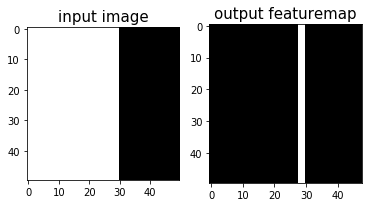

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import paddle
from paddle.nn import Conv2D
from paddle.nn.initializer import Assign
%matplotlib inline

# 创建初始化权重参数w
w = np.array([1, 0, -1], dtype='float32')
# 将权重参数调整成维度为[cout, cin, kh, kw]的四维张量
w = w.reshape([1, 1, 1, 3])
# 创建卷积算子，设置输出通道数，卷积核大小，和初始化权重参数
# kernel_size = [1, 3]表示kh = 1, kw=3
# 创建卷积算子的时候，通过参数属性weight_attr指定参数初始化方式
# 这里的初始化方式时，从numpy.ndarray初始化卷积参数
conv = Conv2D(in_channels=1, out_channels=1, kernel_size=[1, 3],
       weight_attr=paddle.ParamAttr(
          initializer=Assign(value=w)))

# 创建输入图片，图片左边的像素点取值为1，右边的像素点取值为0
img = np.ones([50,50], dtype='float32')
img[:, 30:] = 0.
# 将图片形状调整为[N, C, H, W]的形式
x = img.reshape([1,1,50,50])
# 将numpy.ndarray转化成paddle中的tensor
x = paddle.to_tensor(x)
# 使用卷积算子作用在输入图片上
y = conv(x)
# 将输出tensor转化为numpy.ndarray
out = y.numpy()
f = plt.subplot(121)
f.set_title('input image', fontsize=15)
plt.imshow(img, cmap='gray')
f = plt.subplot(122)
f.set_title('output featuremap', fontsize=15)
# 卷积算子Conv2D输出数据形状为[N, C, H, W]形式
# 此处N, C=1，输出数据形状为[1, 1, H, W]，是4维数组
# 但是画图函数plt.imshow画灰度图时，只接受2维数组
# 通过numpy.squeeze函数将大小为1的维度消除
plt.imshow(out.squeeze(), cmap='gray')
plt.show()

In [ ]:
# 查看卷积层的权重参数名字和数值
print(conv.weight)
# 参看卷积层的偏置参数名字和数值
print(conv.bias)

Parameter containing:
Tensor(shape=[1, 1, 1, 3], dtype=float32, place=CUDAPlace(0), stop_gradient=False,
       [[[[ 1.,  0., -1.]]]])
Parameter containing:
Tensor(shape=[1], dtype=float32, place=CUDAPlace(0), stop_gradient=False,
       [0.])


<br></br>
**案例2——图像中物体边缘检测**

上面展示的是一个人为构造出来的简单图片，使用卷积网络检测图片明暗分界处的示例。对于真实的图片，也可以使用合适的卷积核(3\*3卷积核的中间值是8，周围一圈的值是8个-1)对其进行操作，用来检测物体的外形轮廓，观察输出特征图跟原图之间的对应关系，如下代码所示：

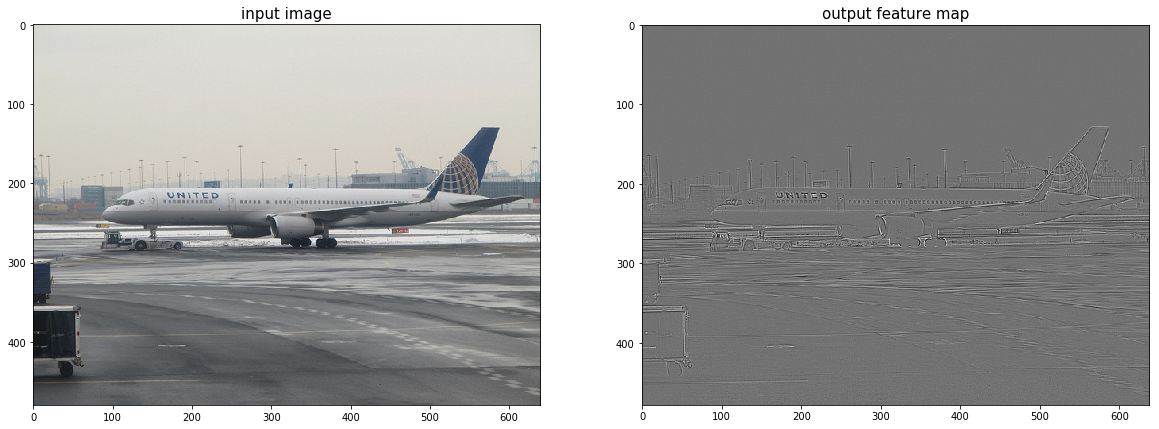

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import paddle
from paddle.nn import Conv2D
from paddle.nn.initializer import Assign
img = Image.open('./work/images/section1/000000098520.jpg')

# 设置卷积核参数
w = np.array([[-1,-1,-1], [-1,8,-1], [-1,-1,-1]], dtype='float32')/8
w = w.reshape([1, 1, 3, 3])
# 由于输入通道数是3，将卷积核的形状从[1,1,3,3]调整为[1,3,3,3]
w = np.repeat(w, 3, axis=1)
# 创建卷积算子，输出通道数为1，卷积核大小为3x3，
# 并使用上面的设置好的数值作为卷积核权重的初始化参数
conv = Conv2D(in_channels=3, out_channels=1, kernel_size=[3, 3], 
            weight_attr=paddle.ParamAttr(
              initializer=Assign(value=w)))
    
# 将读入的图片转化为float32类型的numpy.ndarray
x = np.array(img).astype('float32')
# 图片读入成ndarry时，形状是[H, W, 3]，
# 将通道这一维度调整到最前面
x = np.transpose(x, (2,0,1))
# 将数据形状调整为[N, C, H, W]格式
x = x.reshape(1, 3, img.height, img.width)
x = paddle.to_tensor(x)
y = conv(x)
out = y.numpy()
plt.figure(figsize=(20, 10))
f = plt.subplot(121)
f.set_title('input image', fontsize=15)
plt.imshow(img)
f = plt.subplot(122)
f.set_title('output feature map', fontsize=15)
plt.imshow(out.squeeze(), cmap='gray')
plt.show()


<br></br>
**案例3——图像均值模糊**

另外一种比较常见的卷积核（5\*5的卷积核中每个值均为1）是用当前像素跟它邻域内的像素取平均，这样可以使图像上噪声比较大的点变得更平滑，如下代码所示：

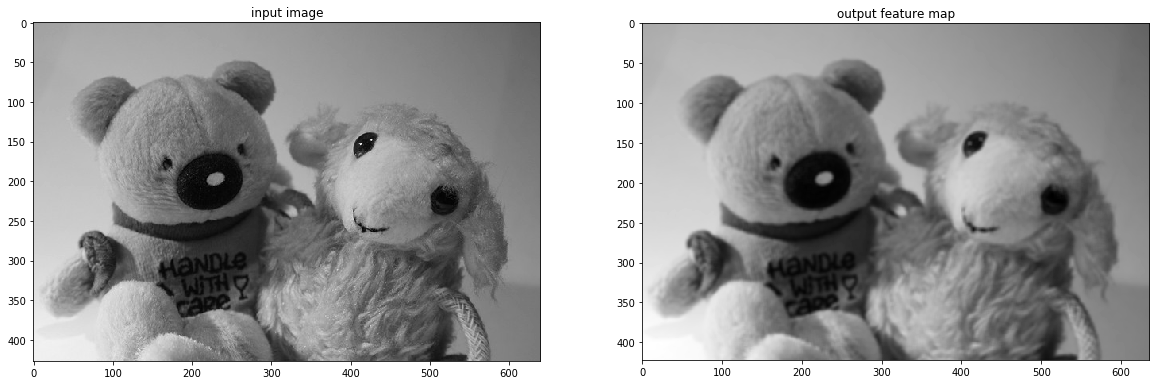

In [ ]:
import paddle
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from paddle.nn import Conv2D
from paddle.nn.initializer import Assign
# 读入图片并转成numpy.ndarray
# 换成灰度图
img = Image.open('./work/images/section1/000000355610.jpg').convert('L')
img = np.array(img)

# 创建初始化参数
w = np.ones([1, 1, 5, 5], dtype = 'float32')/25
conv = Conv2D(in_channels=1, out_channels=1, kernel_size=[5, 5], 
        weight_attr=paddle.ParamAttr(
         initializer=Assign(value=w)))
x = img.astype('float32')
x = x.reshape(1,1,img.shape[0], img.shape[1])
x = paddle.to_tensor(x)
y = conv(x)
out = y.numpy()

plt.figure(figsize=(20, 12))
f = plt.subplot(121)
f.set_title('input image')
plt.imshow(img, cmap='gray')

f = plt.subplot(122)
f.set_title('output feature map')
out = out.squeeze()
plt.imshow(out, cmap='gray')

plt.show()

## 池化（Pooling）


池化是使用某一位置的相邻输出的总体统计特征代替网络在该位置的输出，其好处是当输入数据做出少量平移时，经过池化函数后的大多数输出还能保持不变。比如：当识别一张图像是否是人脸时，我们需要知道人脸左边有一只眼睛，右边也有一只眼睛，而不需要知道眼睛的精确位置，这时候通过池化某一片区域的像素点来得到总体统计特征会显得很有用。由于池化之后特征图会变得更小，如果后面连接的是全连接层，能有效的减小神经元的个数，节省存储空间并提高计算效率。
如 **图15** 所示，将一个$2\times 2$的区域池化成一个像素点。通常有两种方法，平均池化和最大池化。
<br></br>
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/5479daa3734d424bb710615d3c4f7e017ba2558808a8421ca7c914f3fced0a48" width = "600"></center>
<center><br>图15：池化 </br></center>
<br></br>

- 如图15（a）：平均池化。这里使用大小为$2\times2$的池化窗口，每次移动的步幅为2，对池化窗口覆盖区域内的像素取平均值，得到相应的输出特征图的像素值。
- 如图15（b）：最大池化。对池化窗口覆盖区域内的像素取最大值，得到输出特征图的像素值。当池化窗口在图片上滑动时，会得到整张输出特征图。池化窗口的大小称为池化大小，用$k_h \times k_w$表示。在卷积神经网络中用的比较多的是窗口大小为$2 \times 2$，步幅为2的池化。

与卷积核类似，池化窗口在图片上滑动时，每次移动的步长称为步幅，当宽和高方向的移动大小不一样时，分别用$s_w$和$s_h$表示。也可以对需要进行池化的图片进行填充，填充方式与卷积类似，假设在第一行之前填充$p_{h1}$行，在最后一行后面填充$p_{h2}$行。在第一列之前填充$p_{w1}$列，在最后一列之后填充$p_{w2}$列，则池化层的输出特征图大小为：

$$H_{out} = \frac{H + p_{h1} + p_{h2} - k_h}{s_h} + 1$$

$$W_{out} = \frac{W + p_{w1} + p_{w2} - k_w}{s_w} + 1$$

在卷积神经网络中，通常使用$2\times2$大小的池化窗口，步幅也使用2，填充为0，则输出特征图的尺寸为：

$$H_{out} = \frac{H}{2}$$

$$W_{out} = \frac{W}{2}$$

通过这种方式的池化，输出特征图的高和宽都减半，但通道数不会改变。


## 批归一化（Batch Normalization）

[批归一化方法](https://arxiv.org/abs/1502.03167)（Batch Normalization，BatchNorm）是由Ioffe和Szegedy于2015年提出的，已被广泛应用在深度学习中，其目的是对神经网络中间层的输出进行标准化处理，使得中间层的输出更加稳定。

通常我们会对神经网络的数据进行标准化处理，处理后的样本数据集满足均值为0，方差为1的统计分布，这是因为当输入数据的分布比较固定时，有利于算法的稳定和收敛。对于深度神经网络来说，由于参数是不断更新的，即使输入数据已经做过标准化处理，但是对于比较靠后的那些层，其接收到的输入仍然是剧烈变化的，通常会导致数值不稳定，模型很难收敛。BatchNorm能够使神经网络中间层的输出变得更加稳定，并有如下三个优点：

- 使学习快速进行（能够使用较大的学习率）
  
- 降低模型对初始值的敏感性
  
- 从一定程度上抑制过拟合

BatchNorm主要思路是在训练时以mini-batch为单位，对神经元的数值进行归一化，使数据的分布满足均值为0，方差为1。具体计算过程如下：

**1. 计算mini-batch内样本的均值**

$$\mu_B \leftarrow \frac{1}{m}\sum_{i=1}^mx^{(i)}$$

其中$x^{(i)}$表示mini-batch中的第$i$个样本。

例如输入mini-batch包含3个样本，每个样本有2个特征，分别是：

$$x^{(1)} = (1,2), \ \ x^{(2)} = (3,6), \ \ x^{(3)} = (5,10)$$

对每个特征分别计算mini-batch内样本的均值：

$$\mu_{B0} = \frac{1+3+5}{3} = 3, \ \ \ \mu_{B1} = \frac{2+6+10}{3} = 6$$

则样本均值是:

$$\mu_{B} = (\mu_{B0}, \mu_{B1}) = (3, 6)$$

**2. 计算mini-batch内样本的方差**

$$\sigma_B^2 \leftarrow \frac{1}{m}\sum_{i=1}^m(x^{(i)} - \mu_B)^2$$

上面的计算公式先计算一个批次内样本的均值$\mu_B$和方差$\sigma_B^2$，然后再对输入数据做归一化，将其调整成均值为0，方差为1的分布。

对于上述给定的输入数据$x^{(1)}, x^{(2)}, x^{(3)}$，可以计算出每个特征对应的方差：

$$\sigma_{B0}^2 = \frac{1}{3} \cdot ((1-3)^2 + (3-3)^2 + (5-3)^2) = \frac{8}{3}$$

$$\sigma_{B1}^2 = \frac{1}{3} \cdot ((2-6)^2 + (6-6)^2 + (10-6)^2) = \frac{32}{3}$$

则样本方差是：

$$\sigma_{B}^2 = (\sigma_{B0}^2, \sigma_{B1}^2) = (\frac{8}{3}, \frac{32}{3})$$

**3. 计算标准化之后的输出**

$$\hat{x}^{(i)} \leftarrow \frac{x^{(i)} - \mu_B}{\sqrt{(\sigma_B^2 + \epsilon)}}$$

其中$\epsilon$是一个微小值（例如$1e-7$），其主要作用是为了防止分母为0。

对于上述给定的输入数据$x^{(1)}, x^{(2)}, x^{(3)}$，可以计算出标准化之后的输出：

$$\hat{x}^{(1)} = (\frac{1 - 3}{\sqrt{\frac{8}{3}}}, \ \ \frac{2 - 6}{\sqrt{\frac{32}{3}}}) = (-\sqrt{\frac{3}{2}}, \ \ -\sqrt{\frac{3}{2}})$$

$$\hat{x}^{(2)} = (\frac{3 - 3}{\sqrt{\frac{8}{3}}}, \ \ \frac{6 - 6}{\sqrt{\frac{32}{3}}}) = (0, \ \ 0) \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ $$

$$\hat{x}^{(3)} = (\frac{5 - 3}{\sqrt{\frac{8}{3}}}, \ \ \frac{10 - 6}{\sqrt{\frac{32}{3}}}) = (\sqrt{\frac{3}{2}}, \ \ \sqrt{\frac{3}{2}}) \ \ \ \ $$

- 读者可以自行验证由$\hat{x}^{(1)}, \hat{x}^{(2)}, \hat{x}^{(3)}$构成的mini-batch，是否满足均值为0，方差为1的分布。


如果强行限制输出层的分布是标准化的，可能会导致某些特征模式的丢失，所以在标准化之后，BatchNorm会紧接着对数据做缩放和平移。

$$y_i \leftarrow \gamma \hat{x_i} + \beta$$

其中$\gamma$和$\beta$是可学习的参数，可以赋初始值$\gamma = 1, \beta = 0$，在训练过程中不断学习调整。

上面列出的是BatchNorm方法的计算逻辑，下面针对两种类型的输入数据格式分别进行举例。飞桨支持输入数据的维度大小为2、3、4、5四种情况，这里给出的是维度大小为2和4的示例。

* **示例一：** 当输入数据形状是$[N, K]$时，一般对应全连接层的输出，示例代码如下所示。 

这种情况下会分别对K的每一个分量计算N个样本的均值和方差，数据和参数对应如下：
- 输入 x, [N, K]
- 输出 y, [N, K]
- 均值 $\mu_B$，[K, ]
- 方差 $\sigma_B^2$, [K, ]
- 缩放参数$\gamma$, [K, ]
- 平移参数$\beta$, [K, ]

In [ ]:
# 输入数据形状是 [N, K]时的示例
import numpy as np
import paddle
from paddle.nn import BatchNorm1D
# 创建数据
data = np.array([[1,2,3], [4,5,6], [7,8,9]]).astype('float32')
# 使用BatchNorm1D计算归一化的输出
# 输入数据维度[N, K]，num_features等于K
bn = BatchNorm1D(num_features=3)    
x = paddle.to_tensor(data)
y = bn(x)
print('output of BatchNorm1D Layer: \n {}'.format(y.numpy()))

# 使用Numpy计算均值、方差和归一化的输出
# 这里对第0个特征进行验证
a = np.array([1,4,7])
a_mean = a.mean()
a_std = a.std()
b = (a - a_mean) / a_std
print('std {}, mean {}, \n output {}'.format(a_mean, a_std, b))

# 建议读者对第1和第2个特征进行验证，观察numpy计算结果与paddle计算结果是否一致

output of BatchNorm1D Layer: 
 [[-1.2247438 -1.2247438 -1.2247438]
 [ 0.         0.         0.       ]
 [ 1.2247438  1.2247438  1.2247438]]
std 4.0, mean 2.449489742783178, 
 output [-1.22474487  0.          1.22474487]


/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/nn/layer/norm.py:636: UserWarning: When training, we now always track global mean and variance.
  "When training, we now always track global mean and variance.")


* **示例二：** 当输入数据形状是$[N, C, H, W]$时， 一般对应卷积层的输出，示例代码如下所示。

这种情况下会沿着C这一维度进行展开，分别对每一个通道计算N个样本中总共$N\times H \times W$个像素点的均值和方差，数据和参数对应如下：
- 输入 x, [N, C, H, W]
- 输出 y, [N, C, H, W]
- 均值 $\mu_B$，[C, ]
- 方差 $\sigma_B^2$, [C, ]
- 缩放参数$\gamma$, [C, ]
- 平移参数$\beta$, [C, ]

------
**小窍门：**

可能有读者会问：“BatchNorm里面不是还要对标准化之后的结果做仿射变换吗，怎么使用Numpy计算的结果与BatchNorm算子一致？” 这是因为BatchNorm算子里面自动设置初始值$\gamma = 1, \beta = 0$，这时候仿射变换相当于是恒等变换。在训练过程中这两个参数会不断的学习，这时仿射变换就会起作用。

------

In [ ]:
# 输入数据形状是[N, C, H, W]时的batchnorm示例
import numpy as np
import paddle
from paddle.nn import BatchNorm2D

# 设置随机数种子，这样可以保证每次运行结果一致
np.random.seed(100)
# 创建数据
data = np.random.rand(2,3,3,3).astype('float32')
# 使用BatchNorm2D计算归一化的输出
# 输入数据维度[N, C, H, W]，num_features等于C
bn = BatchNorm2D(num_features=3)
x = paddle.to_tensor(data)
y = bn(x)
print('input of BatchNorm2D Layer: \n {}'.format(x.numpy()))
print('output of BatchNorm2D Layer: \n {}'.format(y.numpy()))

# 取出data中第0通道的数据，
# 使用numpy计算均值、方差及归一化的输出
a = data[:, 0, :, :]
a_mean = a.mean()
a_std = a.std()
b = (a - a_mean) / a_std
print('channel 0 of input data: \n {}'.format(a))
print('std {}, mean {}, \n output: \n {}'.format(a_mean, a_std, b))

# 提示：这里通过numpy计算出来的输出
# 与BatchNorm2D算子的结果略有差别，
# 因为在BatchNorm2D算子为了保证数值的稳定性，
# 在分母里面加上了一个比较小的浮点数epsilon=1e-05

input of BatchNorm2D Layer: 
 [[[[0.54340494 0.2783694  0.4245176 ]
   [0.84477615 0.00471886 0.12156912]
   [0.67074907 0.82585275 0.13670659]]

  [[0.5750933  0.89132196 0.20920213]
   [0.18532822 0.10837689 0.21969749]
   [0.9786238  0.8116832  0.17194101]]

  [[0.81622475 0.27407375 0.4317042 ]
   [0.9400298  0.81764936 0.33611196]
   [0.17541045 0.37283206 0.00568851]]]


 [[[0.25242636 0.7956625  0.01525497]
   [0.5988434  0.6038045  0.10514768]
   [0.38194343 0.03647606 0.89041156]]

  [[0.98092085 0.05994199 0.89054596]
   [0.5769015  0.7424797  0.63018394]
   [0.5818422  0.02043913 0.21002658]]

  [[0.5446849  0.76911515 0.25069523]
   [0.2858957  0.8523951  0.9750065 ]
   [0.8848533  0.35950786 0.59885895]]]]
output of BatchNorm2D Layer: 
 [[[[ 0.41260773 -0.46198368  0.02029113]
   [ 1.4071033  -1.3650038  -0.9794093 ]
   [ 0.83283097  1.344658   -0.9294571 ]]

  [[ 0.25201762  1.2038352  -0.8492796 ]
   [-0.92113775 -1.1527538  -0.81768954]
   [ 1.4666054   0.9641302  -0.96


**- 预测时使用BatchNorm**

上面介绍了在训练过程中使用BatchNorm对一批样本进行归一化的方法，但如果使用同样的方法对需要预测的一批样本进行归一化，则预测结果会出现不确定性。

例如样本A、样本B作为一批样本计算均值和方差，与样本A、样本C和样本D作为一批样本计算均值和方差，得到的结果一般来说是不同的。那么样本A的预测结果就会变得不确定，这对预测过程来说是不合理的。解决方法是在训练过程中将大量样本的均值和方差保存下来，预测时直接使用保存好的值而不再重新计算。实际上，在BatchNorm的具体实现中，训练时会计算均值和方差的移动平均值。在飞桨中，默认是采用如下方式计算：

$$saved\_\mu_B \leftarrow \ saved\_\mu_B \times 0.9 + \mu_B \times (1 - 0.9)$$

$$saved\_\sigma_B^2 \leftarrow \ saved\_\sigma_B^2 \times 0.9 + \sigma_B^2 \times (1 - 0.9)$$

在训练过程的最开始将$saved\_\mu_B$和$saved\_\sigma_B^2$设置为0，每次输入一批新的样本，计算出$\mu_B$和$\sigma_B^2$，然后通过上面的公式更新$saved\_\mu_B$和$saved\_\sigma_B^2$，在训练的过程中不断的更新它们的值，并作为BatchNorm层的参数保存下来。预测的时候将会加载参数$saved\_\mu_B$和$saved\_\sigma_B^2$，用他们来代替$\mu_B$和$\sigma_B^2$。

## 丢弃法（Dropout）

丢弃法（Dropout）是深度学习中一种常用的抑制过拟合的方法，其做法是在神经网络学习过程中，随机删除一部分神经元。训练时，随机选出一部分神经元，将其输出设置为0，这些神经元将不对外传递信号。

**图16** 是Dropout示意图，左边是完整的神经网络，右边是应用了Dropout之后的网络结构。应用Dropout之后，会将标了$\times$的神经元从网络中删除，让它们不向后面的层传递信号。在学习过程中，丢弃哪些神经元是随机决定，因此模型不会过度依赖某些神经元，能一定程度上抑制过拟合。
<br></br>
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/2afb5379d93c46c6be802a1257236b5450d3d3a4a2454b36a5ffb4e005e468ec" width = "700"></center>
<center><br>图16 Dropout示意图 </br></center>
<br></br>

在预测场景时，会向前传递所有神经元的信号，可能会引出一个新的问题：训练时由于部分神经元被随机丢弃了，输出数据的总大小会变小。比如：计算其$L1$范数会比不使用Dropout时变小，但是预测时却没有丢弃神经元，这将导致训练和预测时数据的分布不一样。为了解决这个问题，飞桨支持如下两种方法：

- **downscale_in_infer**

训练时以比例$r$随机丢弃一部分神经元，不向后传递它们的信号；预测时向后传递所有神经元的信号，但是将每个神经元上的数值乘以 $(1 - r)$。

- **upscale_in_train**

训练时以比例$r$随机丢弃一部分神经元，不向后传递它们的信号，但是将那些被保留的神经元上的数值除以 $(1 - r)$；预测时向后传递所有神经元的信号，不做任何处理。

在飞桨[Dropout API](https://www.paddlepaddle.org.cn/documentation/docs/en/2.0-rc/api/paddle/nn/layer/common/Dropout_en.html#dropout)中，通过mode参数来指定用哪种方式对神经元进行操作，

> paddle.nn.Dropout(p=0.5, axis=None, mode="upscale_in_train”, name=None)

主要参数如下：

- p (float) ：将输入节点置为0的概率，即丢弃概率，默认值：0.5。该参数对元素的丢弃概率是针对于每一个元素而言，而不是对所有的元素而言。举例说，假设矩阵内有12个数字，经过概率为0.5的dropout未必一定有6个零。

- mode(str) ：丢弃法的实现方式，有'downscale_in_infer'和'upscale_in_train'两种，默认是'upscale_in_train'。

------
**说明：**

不同框架对于Dropout的默认处理方式可能不同，读者可以查看API详细了解。

------

下面这段程序展示了经过Dropout之后输出数据的形式。

In [ ]:
# dropout操作
import paddle
import numpy as np

# 设置随机数种子，这样可以保证每次运行结果一致
np.random.seed(100)
# 创建数据[N, C, H, W]，一般对应卷积层的输出
data1 = np.random.rand(2,3,3,3).astype('float32')
# 创建数据[N, K]，一般对应全连接层的输出
data2 = np.arange(1,13).reshape([-1, 3]).astype('float32')
# 使用dropout作用在输入数据上
x1 = paddle.to_tensor(data1)
# downgrade_in_infer模式下
drop11 = paddle.nn.Dropout(p = 0.5, mode = 'downscale_in_infer')
droped_train11 = drop11(x1)
# 切换到eval模式。在动态图模式下，使用eval（）切换到求值模式，该模式禁用了dropout。
drop11.eval()
droped_eval11 = drop11(x1)
# upscale_in_train模式下
drop12 = paddle.nn.Dropout(p = 0.5, mode = 'upscale_in_train')
droped_train12 = drop12(x1)
# 切换到eval模式
drop12.eval()
droped_eval12 = drop12(x1)

x2 = paddle.to_tensor(data2)
drop21 = paddle.nn.Dropout(p = 0.5, mode = 'downscale_in_infer')
droped_train21 = drop21(x2)
# 切换到eval模式
drop21.eval()
droped_eval21 = drop21(x2)
drop22 = paddle.nn.Dropout(p = 0.5, mode = 'upscale_in_train')
droped_train22 = drop22(x2)
# 切换到eval模式
drop22.eval()
droped_eval22 = drop22(x2)
    
print('x1 {}, \n droped_train11 \n {}, \n droped_eval11 \n {}'.format(data1, droped_train11.numpy(),  droped_eval11.numpy()))
print('x1 {}, \n droped_train12 \n {}, \n droped_eval12 \n {}'.format(data1, droped_train12.numpy(),  droped_eval12.numpy()))
print('x2 {}, \n droped_train21 \n {}, \n droped_eval21 \n {}'.format(data2, droped_train21.numpy(),  droped_eval21.numpy()))
print('x2 {}, \n droped_train22 \n {}, \n droped_eval22 \n {}'.format(data2, droped_train22.numpy(),  droped_eval22.numpy()))

从上述代码的输出可以发现，经过dropout之后，tensor中的某些元素变为了0，这个就是dropout实现的功能，通过随机将输入数据的元素置0，消除减弱了神经元节点间的联合适应性，增强模型的泛化能力。

# 小结

学习完这些概念，您就具备了搭建卷积神经网络的基础。下一节，我们将应用这些基础模块，一起完成图像分类中的典型应用 — 医疗图像中的眼疾筛查任务的模型搭建。

# 作业

## 1 计算卷积中一共有多少次乘法和加法操作

输入数据形状是$[10, 3, 224, 224]$，卷积核$k_h = k_w = 3$，输出通道数为$64$，步幅$stride=1$，填充$p_h = p_w = 1$。

则完成这样一个卷积，一共需要做多少次乘法和加法操作？

- 提示

先看输出一个像素点需要做多少次乘法和加法操作，然后再计算总共需要的操作次数。

- 提交方式

请回复乘法和加法操作的次数，例如：乘法1000，加法1000

## 2 计算网络层的输出数据和参数的形状

网络结构定义如下面的代码所示，输入数据形状是$[10, 3, 224, 224]$，

请分别计算每一层的输出数据形状，以及各层包含的参数形状

In [ ]:
# 定义 SimpleNet 网络结构
import paddle
from paddle.nn import Conv2D, MaxPool2D, Linear
import paddle.nn.functional as F

class SimpleNet(paddle.nn.Layer):
    def __init__(self, num_classes=1):
        #super(SimpleNet, self).__init__(name_scope)
        self.conv1 = Conv2D(in_channels=3, out_channels=6, kernel_size=5, stride=1, padding=2)
        self.max_pool1 = MaxPool2D(kernel_size=2, tride=2)
        self.conv2 = Conv2D(in_channels=6, out_channels=16, kernel_size=5, stride=1, padding=2)
        self.max_pool2 = MaxPool2D(kernel_size=2, tride=2)
        self.fc1 = Linear(in_features=50176, out_features=64)
        self.fc2 = Linear(in_features=64, out_features=num_classes)        

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.max_pool1(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.max_pool2(x)
        x = paddle.reshape(x, [x.shape[0], -1])
        x = self.fc1(x)
        x = F.sigmoid(x)
        x = self.fc2(x)
        return x


- 提示，第一层卷积$conv1$，各项参数如下：

$$C_{in} = 3, C_{out} = 6, k_h = k_w = 5, p_h = p_w = 2, stride = 1$$

则卷积核权重参数$w$的形状是：$[C_{out}, C_{in}, k_h, K_w] = [6, 3, 5, 5]$，个数$6\times3\times5\times5 = 450$

偏置参数$b$的形状是：$[C_{out}]$，偏置参数的个数是6

输出特征图的大小是：

$$H_{out} = 224 + 2\times2 - 5 + 1 = 224, \ \ \ \ \ W_{out} = 224 + 2\times2 - 5 + 1 = 224$$

输出特征图的形状是$[N, C_{out}, H_{out}, W_{out}] = [10, 6, 224, 224]$

请将下面的表格补充完整：

| 名称 | w形状 | w参数个数 | b形状 | b参数个数 | 输出形状 |
| :------: | :------: | :-----: | :-----: | :----: | :----: |
| conv1 | [6,3,5,5] | 450  | [6] | 6 | [10, 6, 224, 224] |
| pool1 | 无 | 无  | 无 | 无 | [10, 6, 112, 112] |
| conv2 |   |    |   |   |   |
| pool2 |   |    |   |   |   |
| fc1 |   |    |   |   |   |
| fc2 |   |    |   |   |   |

- 提交方式：将表格截图发到讨论区


